User clustering Based on their Credit Activity

In [31]:
rng = range(2,10)

score = []
for i in tqdm(rng):
    model = KMeans(n_clusters=i)
    model.fit(application_df.drop(columns=['ID']))
    score.append(model.inertia_)

  0%|          | 0/8 [00:00<?, ?it/s]

C:\Users\Mani\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mani\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mani\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mani\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

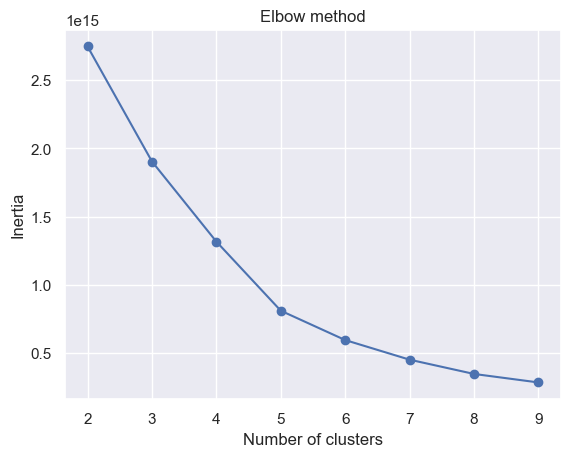

In [33]:
plt.plot(rng, score, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
#Take 3 as the elbow for n_cluster param
model = KMeans(n_clusters=3)
cluster = model.fit_predict(application_df.drop(columns=['ID']))

C:\Users\Mani\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
#Assign cluster to the credit activities Dataframe
application_df['cluster'] = cluster
application_df

,ID,Gender,Own Car,Own Realty,Children Count,Annual Income,Income Type,Education,Family Status,Housing Type,...,Occupation Type,Family Members Count,Approval Status,Reason for Rejection,Credit Score,Credit Score Category,Unemployed,Years Employed,Age,cluster
0,5008804,0,1,1,0,427500,4,1,0,4,...,12,2,1,0,716,0,0,12.443836,32,2
1,5008805,0,1,1,0,427500,4,1,0,4,...,12,2,1,0,740,0,0,12.443836,32,2
2,5008806,0,1,1,0,112500,4,4,1,1,...,17,2,1,0,710,0,0,3.106849,58,0
3,5008808,1,0,1,0,270000,0,4,3,1,...,15,1,1,0,789,1,0,8.358904,52,1
4,5008809,1,0,1,0,270000,0,4,3,1,...,15,1,1,0,731,0,0,8.358904,52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,0,1,0,135000,1,4,2,1,...,12,1,0,5,674,2,1,0.000000,62,0
438553,6840222,1,0,0,0,103500,4,4,3,1,...,8,1,1,0,770,1,0,8.238356,43,0
438554,6841878,1,0,0,0,54000,0,1,3,5,...,15,1,0,4,522,4,0,1.019178,22,0
438555,6842765,1,0,1,0,72000,1,4,1,1,...,12,2,0,3,636,3,1,0.000000,59,0


In [53]:
#Creating categoric variable for numeric variable based on the boxplot
without_sum = application_df.copy()

without_sum['income'] = np.where((without_sum['Annual Income']>=27000)&(without_sum['Annual Income']<=135000),'27k - 135k',
                            np.where((without_sum['Annual Income']>135000)&(without_sum['Annual Income']<=180000),'135k - 180k',
                            np.where((without_sum['Annual Income']>180000)&(without_sum['Annual Income']<=225000),'180k - 225k',
                            np.where((without_sum['Annual Income']>225000)&(without_sum['Annual Income']<=382500),'225k - 382.5k','>382.5k'))))
without_sum['children_count'] = np.where(without_sum['Children Count']==0,'0',
                                    np.where(without_sum['Children Count']==1,'1',
                                    np.where(without_sum['Children Count']==2,'2','>2')))
without_sum['employment_length'] = np.where((without_sum['Years Employed']>=0)&(without_sum['Years Employed']<=1),'0 - 1 yrs',
                                       np.where((without_sum['Years Employed']>1)&(without_sum['Years Employed']<=5),'1 - 5 yrs',
                                       np.where((without_sum['Years Employed']>5)&(without_sum['Years Employed']<=9),'5 - 9 yrs',
                                       np.where((without_sum['Years Employed']>9)&(without_sum['Years Employed']<=21),'9 - 21 yrs','>21 yrs'))))
without_sum['family_member_count'] = np.where(without_sum['Family Members Count']==1,'1',
                                         np.where(without_sum['Family Members Count']==2,'2',
                                         np.where(without_sum['Family Members Count']==3,'3','>3')))
without_sum['age'] = np.where((without_sum['Age']>=21)&(without_sum['Age']<=36),'21 - 36 yrs',
                         np.where((without_sum['Age']>36)&(without_sum['Age']<=45),'36 - 45 yrs',
                         np.where((without_sum['Age']>45)&(without_sum['Age']<=54),'45 - 54 yrs','>54 yrs')))

In [44]:
application_df_unique = application_df.drop(columns=['ID']).groupby('cluster').sum().reset_index()

In [45]:
application_df_unique

,cluster,Gender,Own Car,Own Realty,Children Count,Annual Income,Income Type,Education,Family Status,Housing Type,...,Flag Email,Occupation Type,Family Members Count,Approval Status,Reason for Rejection,Credit Score,Credit Score Category,Unemployed,Years Employed,Age
0,0,200960,84527,187638,115090,35874744229,685658,908582,375031,348151,...,23096,2563558,601450,204116,246147,193452514,317900,57559,1.532281e+06,12009460
1,1,85000,68511,104481,64220,37669547223,337383,421469,202167,185023,...,20773,1290219,323329,129473,61259,108322238,115666,16546,9.635583e+05,6278199
2,2,8480,10060,11955,8125,8695796599,29291,36610,21645,20132,...,3586,147166,37619,15225,4483,12249317,11669,1224,1.144789e+05,713476


In [54]:
#Counting Each Properties from Every Cluster
dum_categoric_ws_unique = pd.get_dummies(without_sum, columns=['Gender', 'Own Car', 'Own Realty', 'children_count','income', 'Unemployed', 'Education','Family Status','age', 'employment_length','family_member_count'])

In [ ]:
polar=pd.melt(dum_categoric_ws_unique,id_vars=["cluster"])
fig1 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True, height=900,width=900
                   ,template='ggplot2')
fig1.show()